In [1]:
import pandas as pd
df = pd.read_csv('UC_buildings_buildingStage.csv')

In [2]:
size_col = df['Size_sf']
ground_broken_col = df['YearQuarterGroundBroken']

In [ ]:
size_col

0        10000
1        43680
2       271111
3       134850
4       130750
        ...   
216     366926
217      30000
218     202242
219     136473
220    1058635
Name: Size_sf, Length: 221, dtype: int64

In [ ]:
size_col[0]

10000

In [3]:
predicted_list = []

In [4]:
def add_quarters(date_str, num_quarters):
    # Split the date string into year and quarter
    year, quarter = map(int, date_str.split('.'))

    # Add the specified number of quarters
    new_quarter = quarter + num_quarters

    # Calculate the new year and adjusted quarter
    new_year = year + (new_quarter - 1) // 4
    new_quarter = (new_quarter - 1) % 4 + 1

    # Combine into the "year.quarter" format
    new_date_str = f"{new_year}.{new_quarter}"

    return new_date_str

In [5]:
#
# for each size thing we give it a quarter
# for each quarter we add it to the quarter of the year broken
# if mod by 4 gives 0 we divide it by 4 and the number we get i
#
for i in range(len(df)):
  num_quarters = 0

  if(size_col[i] <= 99999):
    num_quarters = 2
  elif(size_col[i] >= 100000 and size_col[i] <= 299999):
    num_quarters = 3
  elif(size_col[i] >= 300000 and size_col[i] <= 599999):
    num_quarters = 4
  elif(size_col[i] >= 600000 and size_col[i] <= 999999):
    num_quarters = 5
  elif(size_col[i] >= 1000000):
    num_quarters = 6

  predicted_list.append(float(add_quarters(str(ground_broken_col[i]), num_quarters)))



In [ ]:
predicted_list

[2024.3,
 2023.4,
 2024.2,
 2024.3,
 2024.1,
 2024.2,
 2024.2,
 2024.3,
 2024.3,
 2025.1,
 2023.1,
 2024.2,
 2024.1,
 2024.4,
 2024.2,
 2024.1,
 2023.3,
 2023.4,
 2024.1,
 2023.3,
 2024.1,
 2024.3,
 2023.2,
 2022.3,
 2024.3,
 2023.3,
 2024.3,
 2024.4,
 2024.2,
 2024.1,
 2023.3,
 2023.3,
 2022.3,
 2022.3,
 2023.3,
 2024.4,
 2024.1,
 2024.3,
 2024.2,
 2024.3,
 2023.3,
 2024.3,
 2024.1,
 2023.4,
 2024.1,
 2024.3,
 2024.3,
 2024.4,
 2023.4,
 2024.3,
 2024.1,
 2023.2,
 2023.3,
 2024.4,
 2024.3,
 2023.4,
 2023.4,
 2024.3,
 2022.3,
 2024.3,
 2023.3,
 2024.4,
 2023.4,
 2023.3,
 2023.3,
 2023.4,
 2024.3,
 2024.4,
 2023.3,
 2024.2,
 2024.1,
 2022.2,
 2023.4,
 2024.1,
 2025.2,
 2023.4,
 2023.3,
 2023.1,
 2024.2,
 2023.3,
 2024.3,
 2024.1,
 2024.3,
 2023.3,
 2024.3,
 2024.3,
 2024.2,
 2024.1,
 2024.1,
 2023.4,
 2023.3,
 2024.3,
 2022.4,
 2023.3,
 2023.1,
 2023.1,
 2024.3,
 2024.4,
 2024.3,
 2024.4,
 2024.1,
 2025.3,
 2024.3,
 2023.1,
 2024.1,
 2024.2,
 2023.3,
 2024.2,
 2024.4,
 2023.2,
 2024.3,
 

In [6]:
import csv

# Function to add a column to a CSV file
def add_column_to_csv(input_file, output_file, column_name, numbers):
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        reader = csv.DictReader(infile)
        fieldnames = reader.fieldnames + [column_name]  # Append the new column name
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        writer.writeheader()

        # Write rows with the additional column
        for row, number in zip(reader, numbers):
            row[column_name] = number
            writer.writerow(row)

# Example usage
input_file = 'UC_buildings_buildingStage.csv'
output_file = 'Predicted_UC_buildings_buildingStage.csv'
column_name = 'PredictedCompletionYearQuarter'
  # Your list of numbers

add_column_to_csv(input_file, output_file, column_name, predicted_list)


In [7]:
predicted_df = pd.read_csv('Predicted_UC_buildings_buildingStage.csv')

In [8]:
atlanta_subset = predicted_df[predicted_df['MarketCode'].isin(['ATLANT'])]

In [9]:
len(atlanta_subset)

63

In [10]:
aggregate_atlanta_subset = atlanta_subset.groupby('PredictedCompletionYearQuarter')['Size_sf'].sum().reset_index()

In [11]:
aggregate_atlanta_subset_final = aggregate_atlanta_subset[['PredictedCompletionYearQuarter', 'Size_sf']]

In [12]:
aggregate_atlanta_subset_final['Size_sf_adjusted'] = aggregate_atlanta_subset_final['Size_sf'] / 100.0

In [13]:
aggregate_atlanta_subset_final

,PredictedCompletionYearQuarter,Size_sf,Size_sf_adjusted
0,2022.2,45000,450.00
1,2022.4,224599,2245.99
2,2023.1,838984,8389.84
3,2023.2,295770,2957.70
4,2023.3,1883973,18839.73
5,2023.4,1197420,11974.20
6,2024.1,1171185,11711.85
7,2024.2,2352418,23524.18
8,2024.3,3370708,33707.08
9,2024.4,2408760,24087.60


In [14]:
pred_com_year = aggregate_atlanta_subset_final['PredictedCompletionYearQuarter']
size_sf_adj = aggregate_atlanta_subset_final['Size_sf_adjusted']

In [15]:
len(aggregate_atlanta_subset_final)

13

In [17]:
estimator_df = pd.read_csv('Atlanta_supply_dat.xlsx - Atlanta_dat (1).csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Atlanta_supply_dat.xlsx - Atlanta_dat (1).csv'

In [ ]:
for i in range(6, len(aggregate_atlanta_subset_final)):
  new_row = {"MarketCode": "ATLANT", "MarketName": "Atlanta", "YearQuarter": pred_com_year[i], "Stock_sf": 0, "Completions_sf": size_sf_adj[i], "Stock_Under_Construction_sf": 0, "under_construction_as_a_percentage_of_Stock": 0}
  estimator_df.loc[len(estimator_df)] = new_row

# Reset the index
  estimator_df = estimator_df.reset_index(drop=True)

In [ ]:
estimator_df

,MarketCode,MarketName,YearQuarter,Stock_sf,Completions_sf,Stock_Under_Construction_sf,under_construction_as_a_percentage_of_Stock
0,ATLANT,Atlanta,2000.1,397465,4394.00,4098,1.031
1,ATLANT,Atlanta,2000.2,401081,3616.00,6109,1.523
2,ATLANT,Atlanta,2000.3,405850,4769.00,5352,1.319
3,ATLANT,Atlanta,2000.4,412672,6822.00,7892,1.912
4,ATLANT,Atlanta,2001.1,416867,4195.00,8298,1.991
...,...,...,...,...,...,...,...
98,ATLANT,Atlanta,2024.3,0,33707.08,0,0.000
99,ATLANT,Atlanta,2024.4,0,24087.60,0,0.000
100,ATLANT,Atlanta,2025.1,0,12012.00,0,0.000
101,ATLANT,Atlanta,2025.2,0,18429.00,0,0.000


In [ ]:
for i in range(96, len(estimator_df)):
  estimator_df['Stock_sf'][i] = estimator_df['Stock_sf'][i-1] + estimator_df['Completions_sf'][i]


<ipython-input-46-84a9ead7c15d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estimator_df['Stock_sf'][i] = estimator_df['Stock_sf'][i-1] + estimator_df['Completions_sf'][i]
<ipython-input-46-84a9ead7c15d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estimator_df['Stock_sf'][i] = estimator_df['Stock_sf'][i-1] + estimator_df['Completions_sf'][i]
<ipython-input-46-84a9ead7c15d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esti

In [ ]:
estimator_df

,MarketCode,MarketName,YearQuarter,Stock_sf,Completions_sf,Stock_Under_Construction_sf,under_construction_as_a_percentage_of_Stock
0,ATLANT,Atlanta,2000.1,397465.00,4394.00,4098,1.031
1,ATLANT,Atlanta,2000.2,401081.00,3616.00,6109,1.523
2,ATLANT,Atlanta,2000.3,405850.00,4769.00,5352,1.319
3,ATLANT,Atlanta,2000.4,412672.00,6822.00,7892,1.912
4,ATLANT,Atlanta,2001.1,416867.00,4195.00,8298,1.991
...,...,...,...,...,...,...,...
98,ATLANT,Atlanta,2024.3,799289.11,33707.08,0,0.000
99,ATLANT,Atlanta,2024.4,823376.71,24087.60,0,0.000
100,ATLANT,Atlanta,2025.1,835388.71,12012.00,0,0.000
101,ATLANT,Atlanta,2025.2,853817.71,18429.00,0,0.000


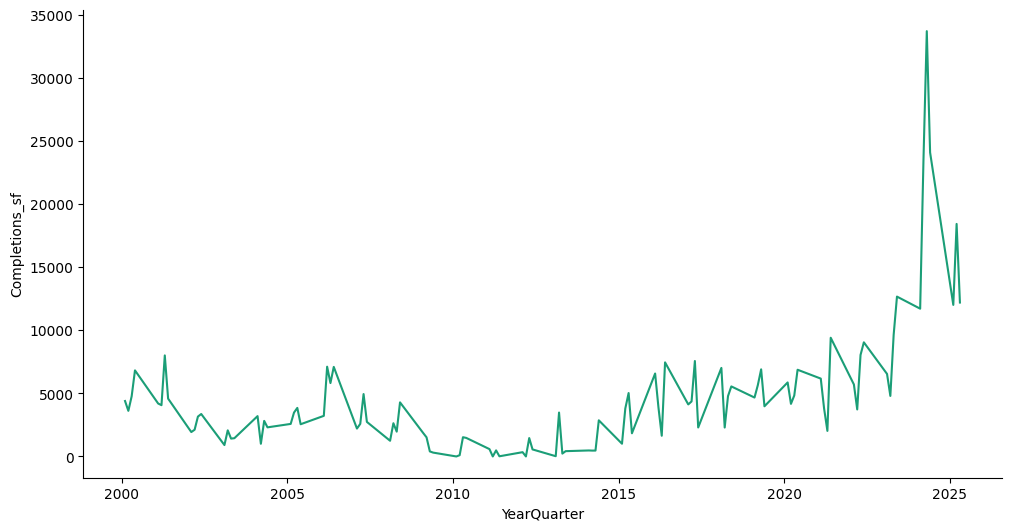

In [ ]:
# @title YearQuarter vs Completions_sf

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['YearQuarter']
  ys = series['Completions_sf']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = estimator_df.sort_values('YearQuarter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('YearQuarter')
_ = plt.ylabel('Completions_sf')

In [ ]:
estimator_df.to_csv('Atlanta_Estimator_DAT_FINAL.csv', index=True)